In [10]:
from dpm.models import LogisticRegression, BayesianLogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch
from sklearn.datasets import make_classification

In [21]:
x, y = make_classification()
x = torch.tensor(x).float()
y = torch.tensor(y).view(-1, 1).float()
x.shape, y.shape

(torch.Size([100, 20]), torch.Size([100, 1]))

In [23]:
model = LogisticRegression(input_dim=x.size(1))

In [24]:
[p.view(-1) for p in model.model.parameters()]

[tensor([ 0.1435,  0.0143,  0.0759, -0.2097,  0.0992, -0.0810, -0.0105, -0.1602,
          0.1274, -0.2092, -0.1305,  0.2189,  0.1721, -0.1017, -0.0669,  0.0715,
         -0.0322, -0.2017, -0.0113,  0.1825], grad_fn=<ViewBackward>),
 tensor([-0.2121], grad_fn=<ViewBackward>)]

In [25]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([ 0.1435,  0.0143,  0.0759, -0.2097,  0.0992, -0.0810, -0.0105, -0.1602,
         0.1274, -0.2092, -0.1305,  0.2189,  0.1721, -0.1017, -0.0669,  0.0715,
        -0.0322, -0.2017, -0.0113,  0.1825, -0.2121], grad_fn=<CatBackward>)

In [26]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [27]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.3378,  4.4016,  0.7140, -1.8808,  0.3430,  7.1102, -0.3690, -1.9444,
          2.3575, -5.7619,  0.1106, -0.9678,  1.3314,  0.5321,  2.7889, -0.6074,
          1.2283,  0.8429, -6.0965,  0.1393], grad_fn=<ViewBackward>),
 tensor([-2.1315], grad_fn=<ViewBackward>)]

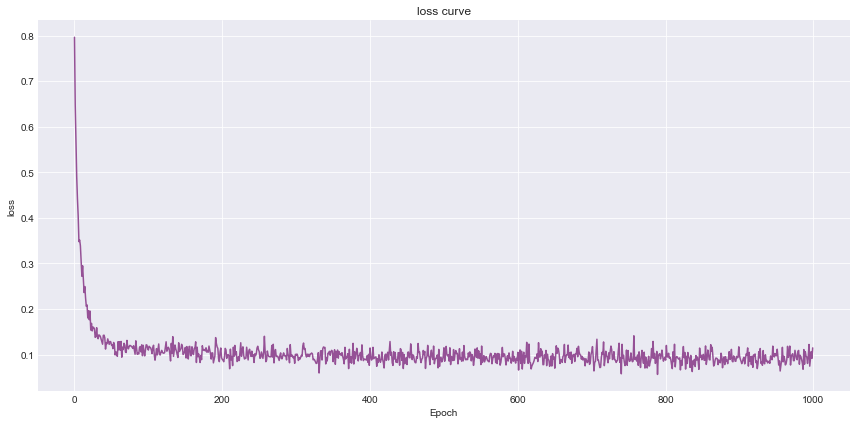

In [28]:
plot_stats(stats)

In [29]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[-0.3378],
        [ 4.4016],
        [ 0.7140],
        [-1.8808],
        [ 0.3430],
        [ 7.1102],
        [-0.3690],
        [-1.9444],
        [ 2.3575],
        [-5.7619],
        [ 0.1106],
        [-0.9678],
        [ 1.3314],
        [ 0.5321],
        [ 2.7889],
        [-0.6074],
        [ 1.2283],
        [ 0.8429],
        [-6.0965],
        [ 0.1393],
        [-2.1315]], grad_fn=<ViewBackward>)

In [30]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([-8.3212e-05, -3.1506e-01, -4.3456e-03, -4.9456e-03, -1.1921e-06,
        -1.6565e-02, -2.1985e-01, -1.1165e-01, -2.0416e-03, -5.5871e-04,
        -1.0133e-06, -5.7467e-02, -7.5520e-03, -6.5565e-07, -3.6711e-04,
        -3.7283e-02, -5.5414e-02, -4.6265e-03, -4.0531e-06, -1.7977e-01,
        -5.9605e-08, -1.1921e-07, -8.5848e-02, -5.2168e-04, -1.8219e-01,
        -5.6686e-05, -3.8743e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -3.1760e-01, -3.5024e-03, -2.1100e-05, -1.6822e-04, -4.9944e-02,
         0.0000e+00, -2.9802e-07, -2.4004e-03,  0.0000e+00, -1.0071e-03,
        -2.3195e-04, -8.5831e-06, -5.9605e-08, -1.7881e-07, -1.1921e-07,
         0.0000e+00,  0.0000e+00, -1.5378e-05, -1.6809e-05, -2.3842e-07,
        -3.5763e-07, -1.6903e+00, -8.2556e-05, -2.8877e-04,  0.0000e+00,
        -2.3784e-01, -2.2285e-01, -1.1642e-02, -3.8130e-04,  0.0000e+00,
        -3.5763e-07,  0.0000e+00, -1.0796e-02, -2.2954e-03, -3.7790e-05,
        -1.1921e-07,  0.0000e+00, -2.7713e-03, -3.3

In [31]:
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor(0.9700)

In [35]:
model = BayesianLogisticRegression(input_dim=x.size(1))
model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor(0.5000)